# **Cervical Cancer Risk Prediction Using Machine Learning**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import  train_test_split,GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, XGBRegressor, plot_importance

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

import pickle

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('cervical_cancer.csv')
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0


In [3]:
df.shape

(858, 36)

## Step 1 : Replace'?' with NaN and impute the filling the missing values with mean()

In [4]:
df.replace({'?': np.nan}, inplace=True)
df = df.apply(pd.to_numeric, errors='coerce')
df = df.fillna(df.mean().round(2))
df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,6.14,5.82,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,6.14,5.82,0,0,0,0,0,0,0,0
2,34,1.0,17.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,6.14,5.82,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,6.14,5.82,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,6.14,5.82,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,6.14,5.82,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,6.14,5.82,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,6.14,5.82,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,6.14,5.82,0,0,0,0,0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           858 non-null    float64
 2   First sexual intercourse            858 non-null    float64
 3   Num of pregnancies                  858 non-null    float64
 4   Smokes                              858 non-null    float64
 5   Smokes (years)                      858 non-null    float64
 6   Smokes (packs/year)                 858 non-null    float64
 7   Hormonal Contraceptives             858 non-null    float64
 8   Hormonal Contraceptives (years)     858 non-null    float64
 9   IUD                                 858 non-null    float64
 10  IUD (years)                         858 non-null    float64
 11  STDs                                858 non-n

In [6]:
df.isnull().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


## Step 2 - Dropping Unnecassary feature for ML

In [7]:
df = df.drop(columns=['STDs: Time since first diagnosis', 'STDs: Time since last diagnosis','STDs (number)','Dx:HPV'])

In [8]:
df.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.0,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.0,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.527716,16.995338,2.275851,0.145629,1.219726,0.453096,0.641166,2.256870,0.111737,0.514149,0.104312,0.058625,0.0,0.005886,0.057459,0.023427,0.001166,0.001166,0.001166,0.0,0.023427,0.001166,0.002331,0.087413,0.020979,0.010490,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,1.642267,2.791883,1.399326,0.350189,4.057885,2.209657,0.448671,3.519082,0.293261,1.805586,0.287252,0.219868,0.0,0.068154,0.217510,0.143189,0.034139,0.034139,0.034139,0.0,0.143189,0.034139,0.048252,0.302545,0.143398,0.101939,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,2.260000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,19.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df['Biopsy'].value_counts(normalize=True)*100

Biopsy
0    93.589744
1     6.410256
Name: proportion, dtype: float64

It seems like the proportion of instances for each class in the 'Biopsy' column is as follows:

    Class 0: Approximately 93.59%
    Class 1: Approximately 6.41%

This indicates that the dataset is imbalanced, with a significantly higher number of instances belonging to class 0 compared to class 1.

Class imbalance can sometimes pose challenges during model training, as the model may become biased towards the majority class and have difficulty learning patterns from the minority class.

## Step 3 - Resampling the Dependent Variable

### Resampling: 

In [10]:
# Assuming df is your DataFrame containing the 'Biopsy' column
# First, separate the data into two groups based on the class label
class_0 = df[df['Biopsy'] == 0]
class_1 = df[df['Biopsy'] == 1]

# Next, resample the minority class (class 1) to match the proportion of the majority class (class 0)
class_1_resampled = class_1.sample(n=len(class_0), replace=True, random_state=42)

# Concatenate the resampled minority class with the original majority class
df_resampled = pd.concat([class_0, class_1_resampled])

# Shuffle the DataFrame to randomize the order of samples
df0 = df_resampled.sample(frac=1, random_state=42).reset_index(drop=True)
df0

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx,Hinselmann,Schiller,Citology,Biopsy
0,26,2.0,19.0,1.00,0.15,1.22,0.450,0.64,2.26,0.11,0.51,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0
1,18,2.0,17.0,2.28,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0,1
2,30,1.0,16.0,2.00,0.00,0.00,0.000,1.00,9.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0
3,31,3.0,15.0,6.00,1.00,0.50,0.025,1.00,6.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0
4,16,28.0,10.0,1.00,1.00,5.00,5.000,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1601,33,3.0,19.0,3.00,0.00,0.00,0.000,1.00,0.16,1.00,3.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,1,1,0,1
1602,37,3.0,19.0,3.00,1.00,12.00,6.000,1.00,13.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0,1
1603,25,6.0,17.0,2.00,0.00,0.00,0.000,1.00,2.00,0.00,0.00,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0,0,0,0,1,1,1
1604,21,4.0,15.0,1.00,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,1,1


In [11]:
df0.shape

(1606, 32)

In [12]:
df_model = df0.to_csv('df_model.csv')

In [13]:
X = df0.drop(columns=['Biopsy'])
y = df0['Biopsy']

<Axes: >

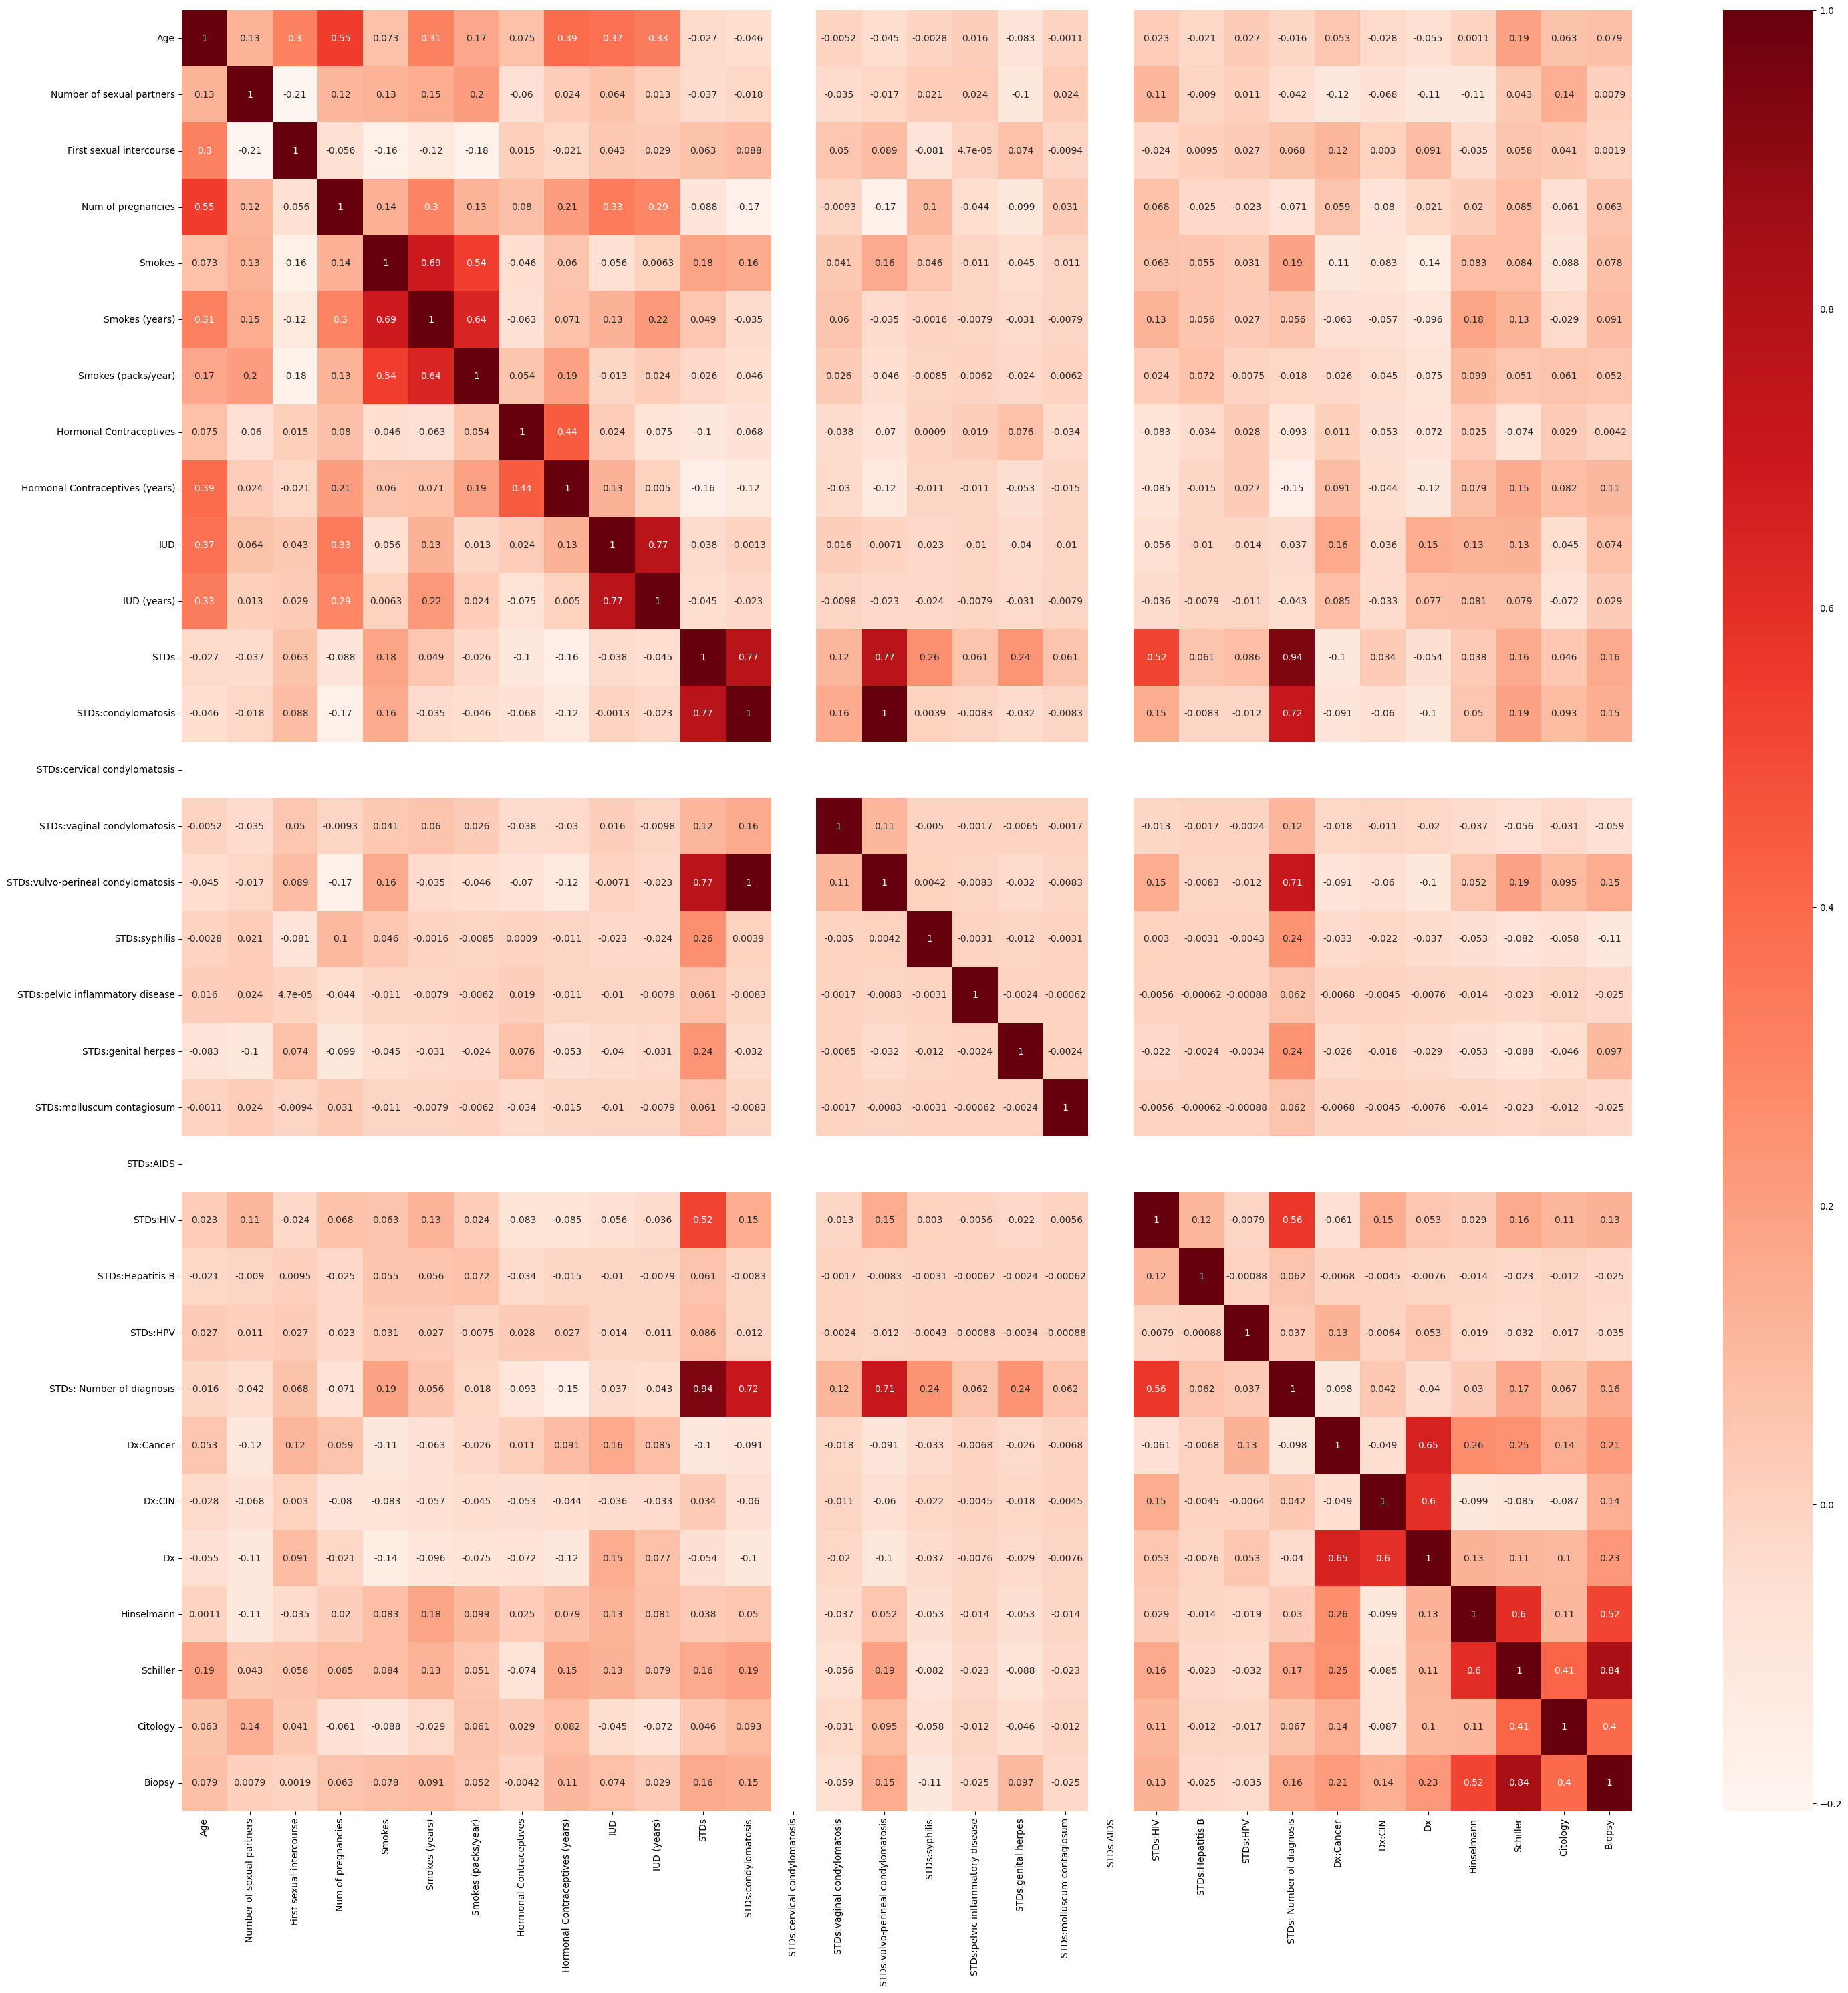

In [14]:
correlation_matrix = df0.corr()

plt.figure(figsize = (35, 35))
sns.heatmap(correlation_matrix,annot = True, cmap='Reds')

In [15]:
correlation_matrix

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx,Hinselmann,Schiller,Citology,Biopsy
Age,1.000000,0.128967,0.304656,0.546669,0.072704,0.309794,0.168858,0.075073,0.388315,0.371090,0.326812,-0.027306,-0.045898,NaN,-0.005250,-0.044932,-0.002804,0.016204,-0.082834,-0.001103,NaN,0.022657,-0.021294,0.027004,-0.015785,0.052640,-0.027698,-0.055134,0.001118,0.194562,0.063163,0.079294
Number of sexual partners,0.128967,1.000000,-0.205250,0.115557,0.126377,0.148700,0.204441,-0.059760,0.023906,0.063689,0.012771,-0.036734,-0.017683,NaN,-0.034506,-0.016946,0.021249,0.024438,-0.100293,0.024438,NaN,0.111822,-0.009042,0.010890,-0.041628,-0.115172,-0.067986,-0.109743,-0.108709,0.043099,0.141068,0.007930
First sexual intercourse,0.304656,-0.205250,1.000000,-0.055580,-0.164581,-0.116738,-0.177524,0.014980,-0.020923,0.043204,0.029325,0.063193,0.087563,NaN,0.049803,0.089496,-0.080982,0.000047,0.074065,-0.009449,NaN,-0.023903,0.009544,0.026935,0.067575,0.119124,0.003045,0.091069,-0.034968,0.058392,0.041073,0.001895
Num of pregnancies,0.546669,0.115557,-0.055580,1.000000,0.135573,0.299463,0.126416,0.080410,0.205286,0.332980,0.291555,-0.088267,-0.171242,NaN,-0.009326,-0.171206,0.101406,-0.044341,-0.098859,0.031369,NaN,0.067901,-0.025414,-0.022564,-0.070955,0.059494,-0.079910,-0.021207,0.019606,0.085126,-0.060970,0.062759
Smokes,0.072704,0.126377,-0.164581,0.135573,1.000000,0.690919,0.539298,-0.045797,0.060463,-0.056333,0.006316,0.182307,0.156761,NaN,0.041391,0.158255,0.045991,-0.011487,-0.044682,-0.011487,NaN,0.063044,0.055195,0.030916,0.185947,-0.111292,-0.083339,-0.138509,0.083406,0.083526,-0.088269,0.078263
Smokes (years),0.309794,0.148700,-0.116738,0.299463,0.690919,1.000000,0.643350,-0.063165,0.070502,0.130515,0.221397,0.049473,-0.035359,NaN,0.059950,-0.034775,-0.001595,-0.007917,-0.030799,-0.007917,NaN,0.128348,0.055590,0.026810,0.055946,-0.062782,-0.057444,-0.095555,0.181177,0.126959,-0.028846,0.091246
Smokes (packs/year),0.168858,0.204441,-0.177524,0.126416,0.539298,0.643350,1.000000,0.054238,0.194418,-0.012807,0.023580,-0.026201,-0.046273,NaN,0.025826,-0.045875,-0.008550,-0.006187,-0.024069,-0.006187,NaN,0.023614,0.071997,-0.007489,-0.017578,-0.026231,-0.044891,-0.074642,0.098976,0.051057,0.061220,0.051513
Hormonal Contraceptives,0.075073,-0.059760,0.014980,0.080410,-0.045797,-0.063165,0.054238,1.000000,0.444427,0.023875,-0.075035,-0.102467,-0.067843,NaN,-0.038016,-0.069759,0.000896,0.019454,0.075675,-0.034331,NaN,-0.083402,-0.034331,0.027520,-0.092977,0.011362,-0.052900,-0.072005,0.024938,-0.074408,0.029045,-0.004186
Hormonal Contraceptives (years),0.388315,0.023906,-0.020923,0.205286,0.060463,0.070502,0.194418,0.444427,1.000000,0.131151,0.004961,-0.156709,-0.119239,NaN,-0.029552,-0.118783,-0.010685,-0.010840,-0.053192,-0.015091,NaN,-0.085457,-0.015091,0.026764,-0.154561,0.091311,-0.043965,-0.115463,0.079410,0.154786,0.082313,0.108588
IUD,0.371090,0.063689,0.043204,0.332980,-0.056333,0.130515,-0.012807,0.023875,0.131151,1.000000,0.768165,-0.038382,-0.001256,NaN,0.016203,-0.007133,-0.022977,-0.010155,-0.039503,-0.010155,NaN,-0.056465,-0.010155,-0.014366,-0.037311,0.162307,-0.036030,0.151013,0.125199,0.129780,-0.044620,0.073715


In [16]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [17]:
print('X_train : Shape - ',X_train.shape)
print('X_test  : Shape - ',X_test.shape)
print('y_train : Shape - ',y_train.shape)
print('y_test  : Shape - ',y_test.shape)

X_train : Shape -  (1284, 31)
X_test  : Shape -  (322, 31)
y_train : Shape -  (1284,)
y_test  : Shape -  (322,)


## Random Forest Classifier

In [18]:
# 1. Instantiate the random forest classifier
rf = RandomForestClassifier(random_state=42)

# 2. Create a dictionary of hyperparameters to tune 
# Note that this example only contains 1 value for each parameter for simplicity,
# but you should assign a dictionary with ranges of values
cv_params = {'max_depth': [None],
             'max_features': [1.0],
             'max_samples': [0.7],
             'min_samples_leaf': [1],
             'min_samples_split': [2],
             'n_estimators': [300]
             }

# 3. Define a set of scoring metrics to capture
scoring = {'accuracy': 'accuracy', 'precision': 'precision', 'recall': 'recall', 'f1': 'f1'}

# 4. Instantiate the GridSearchCV object
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='f1')

In [19]:
%%time
rf1.fit(X_train, y_train)

CPU times: total: 4.64 s
Wall time: 4.76 s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None], 'max_features': [1.0],
                         'max_samples': [0.7], 'min_samples_leaf': [1],
                         'min_samples_split': [2], 'n_estimators': [300]},
             refit='f1',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall'})

In [20]:
# Examine best score
rf1.best_score_

0.9801687568734534

In [21]:
# Examine best score
rf1.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [22]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
    model_name (string): what you want the model to be called in the output table
    model_object: a fit GridSearchCV object
    metric (string): precision, recall, f1, or accuracy

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                 'recall': 'mean_test_recall',
                 'f1': 'mean_test_f1',
                 'accuracy': 'mean_test_accuracy',
                 }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    f1 = round(best_estimator_results.mean_test_f1*100,3)
    recall = round(best_estimator_results.mean_test_recall*100,3)
    precision = round(best_estimator_results.mean_test_precision*100,3)
    accuracy = round(best_estimator_results.mean_test_accuracy*100,3)

    # Create table of results
    table = pd.DataFrame({'model': [model_name],
                        'accuracy': [accuracy],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        },
                       )

    return table

In [23]:
# Call 'make_results()' on the GridSearch object
results = make_results('RF CV', rf1, 'f1')
results

,model,accuracy,precision,recall,F1
0,RF CV,97.975,96.116,100.0,98.017


In [24]:
# Get scores on test data
rf_preds = rf1.best_estimator_.predict(X_test)


In [25]:
def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Generate a table of test scores.

    In:
    model_name (string): Your choice: how the model will be named in the output table
    preds: numpy array of test predictions
    y_test_data: numpy array of y_test data

    Out:
    table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    accuracy = round(accuracy_score(y_test_data, preds)*100,3)
    precision = round(precision_score(y_test_data, preds)*100,3)
    recall = round(recall_score(y_test_data, preds)*100,3)
    f1 = round(f1_score(y_test_data, preds)*100,3)

    table = pd.DataFrame({'model': [model_name],
                          'accuracy': [accuracy],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1]
                         })

    return table

In [26]:
rf_test_scores = get_test_scores('RF test', rf_preds, y_test)

results = pd.concat([results, rf_test_scores], axis=0)
results

,model,accuracy,precision,recall,F1
0,RF CV,97.975,96.116,100.0,98.017
0,RF test,99.068,98.171,100.0,99.077


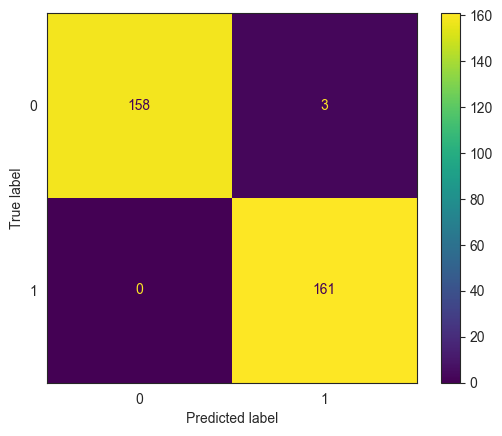

In [28]:
# Generate array of values for confusion matrix
sns.set_style("white")
cm = confusion_matrix(y_test, rf_preds, labels=rf1.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rf1.classes_)
disp.plot(values_format='');

##  XGBoost Model

In [ ]:
# 1. Instantiate the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=0)

# 2. Create a dictionary of hyperparameters to tune
# Note that this example only contains 1 value for each parameter for simplicity,
# but you should assign a dictionary with ranges of values
cv_params = {'learning_rate': [0.1],
             'max_depth': [8],
             'min_child_weight': [2],
             'n_estimators': [500]
             }

# 3. Define a set of scoring metrics to capture
scoring = {'accuracy': 'accuracy', 'precision': 'precision', 'recall': 'recall', 'f1': 'f1'}

# 4. Instantiate the GridSearchCV object
xgb1 = GridSearchCV(xgb, cv_params, scoring=scoring, cv=4, refit='f1')

In [ ]:
%%time
xgb1.fit(X_train, y_train)

In [ ]:
# Examine best score
xgb1.best_score_

In [ ]:
# Examine best parameters
xgb1.best_params_

In [ ]:
# Call 'make_results()' on the GridSearch object
xgb1_cv_results = make_results('XGB CV', xgb1, 'f1')
results = pd.concat([results, xgb1_cv_results], axis=0)
results

In [ ]:
# Get scores on test data
xgb_preds = xgb1.best_estimator_.predict(X_test)

In [ ]:
# Get scores on test data
xgb_test_scores = get_test_scores('XGB test', xgb_preds, y_test)
results = pd.concat([results, xgb_test_scores], axis=0)
results

In [ ]:
xgb_preds.size

In [ ]:
# Generate array of values for confusion matrix
sns.set_style("white")
cm = confusion_matrix(y_test, xgb_preds, labels=xgb1.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=xgb1.classes_)
disp.plot(values_format='');


### Based on the confusion matrix:

The model achieved a high number of **`true positive predictions (157)`**, indicating that it effectively identified instances belonging to the positive class.

**`The false positive count (4)`** suggests that there were a few instances incorrectly classified as positive when they actually belonged to the negative class. While this indicates some level of misclassification, the number is relatively low compared to the true positives.

Notably, there were no **`false negative predictions (0)`**, implying that the model correctly identified all instances belonging to the negative class.

The **`true negative count (161)`** indicates that the model accurately identified instances belonging to the negative class.

In [ ]:
print(classification_report(y_test, xgb_preds))

## **Feature importance**

In [ ]:
importances = rf1.best_estimator_.feature_importances_
rf_importances = pd.Series(importances, index=X_test.columns)
rf_importances = rf_importances.sort_values(ascending=False)[:15]

fig, ax = plt.subplots(figsize=(8,5))
rf_importances.plot.bar(ax=ax)
ax.set_title('Feature importances')
ax.set_ylabel('Mean decrease in impurity')
fig.tight_layout();

#  **Saving the trained model to a pickle file**

In [ ]:
path = 'F:/Case study/Interview preparation/01.Project/05. cervical_cancer/Final/'

In [ ]:
def write_pickle(path, model_object, save_name:str):
    '''
    save_name is a string.
    '''
    with open(path + save_name + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)
        

In [ ]:
def read_pickle(path, saved_model_name:str):
    '''
    saved_model_name is a string.
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

        return model

In [ ]:
write_pickle(path,rf1,'RF')
write_pickle(path,xgb1,'XGB')

In [ ]:
read_pickle(path,'RF')

In [ ]:
read_pickle(path,'XGB')

# Prediction 

In [ ]:
df_sample = df0.reset_index(drop=True)
df_sample.head()

In [ ]:
X1 = df_sample.drop(columns=['Biopsy'])
y1 = df_sample['Biopsy']

In [ ]:
prediction = xgb1.best_estimator_.predict(X1)

prediction_df = pd.DataFrame({'Predicted Values': prediction })
prediction_df.head()

In [ ]:
# Assuming prediction_df and df0 are your DataFrames
merged_df = pd.merge(df_sample, prediction_df,left_index=True, right_index=True)

In [ ]:
merged_df.sample(10)

In [ ]:
merged_df['Predicted Values'].value_counts()

In [ ]:
merged_df['Biopsy'].value_counts()

In [ ]:
xgb_test1 = get_test_scores('XGB test', prediction_df,y1)
xgb_test1